In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 


In [2]:
df= pd.read_csv('Stock.csv')


In [3]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


In [4]:
df.shape

(1009, 7)

In [5]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [6]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [7]:
df.isna().sum().any()

False

In [8]:
df['Date']= pd.to_datetime(df['Date'], format='%Y-%m-%d')

In [9]:
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [10]:
df.head()
df.columns


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [26]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


In [27]:
df.set_index('Date',inplace=True)

## Selecting the features
* we will use the ['Close'] column as the value to predict.
* And we will use 'Date' as the index column


    



In [28]:
# we will create a new data frame which will only consist of Close column 
df1= pd.DataFrame(df, columns=['Close'])
df1=df1.reset_index()


In [29]:
df1

,Date,Close
0,2018-02-05,254.259995
1,2018-02-06,265.720001
2,2018-02-07,264.559998
3,2018-02-08,250.100006
4,2018-02-09,249.470001
...,...,...
1004,2022-01-31,427.140015
1005,2022-02-01,457.130005
1006,2022-02-02,429.480011
1007,2022-02-03,405.600006


In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   1009 non-null   int64  
 1   Close   1009 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 15.9 KB



* Now as the preprocessing is done we will try to examine the data using matplotlib, so that we can find the relationship between the columns.

In [30]:
df1

,Date,Close
0,2018-02-05,254.259995
1,2018-02-06,265.720001
2,2018-02-07,264.559998
3,2018-02-08,250.100006
4,2018-02-09,249.470001
...,...,...
1004,2022-01-31,427.140015
1005,2022-02-01,457.130005
1006,2022-02-02,429.480011
1007,2022-02-03,405.600006


In [31]:
import matplotlib.dates as md
import matplotlib.pyplot as plt


In [33]:
yr= md.YearLocator()
yrfmt=md.DateFormatter('%Y')


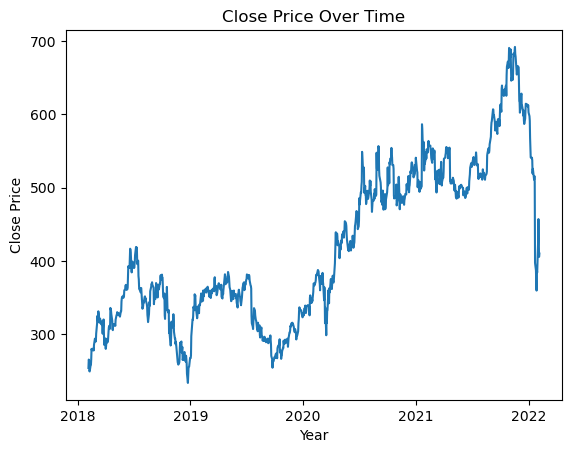

In [34]:
import matplotlib.pyplot as plt

# Create a figure and a single subplot
fig, ax = plt.subplots()

# Now you can plot your data on the subplot
ax.plot(df1['Date'], df1['Close'])

# Customize the plot as needed
ax.xaxis.set_major_locator(yr)
ax.xaxis.set_major_formatter(yrfmt)
ax.set_xlabel('Year')
ax.set_ylabel('Close Price')
ax.set_title('Close Price Over Time')
plt.show()








In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression



# Split data into train and test set: 80% / 20%
train, test = train_test_split(df1, test_size=0.20)

## Now we will create a model and train it

In [36]:
X_train=np.array(train.index).reshape(-1,1)
y_train=train['Close']

In [37]:
y_train



789    502.859985
410    265.920013
134    322.440002
712    503.380005
478    323.309998
          ...    
897    558.919983
403    288.859985
42     288.850006
825    488.940002
966    612.690002
Name: Close, Length: 807, dtype: float64

In [38]:
X_train.ndim

2

In [39]:
# Create LinearRegression Object
mod = LinearRegression()
# Fit linear model using the train data set
mod.fit(X_train, y_train)


LinearRegression()

In [40]:
mod.intercept_

263.08388372598824

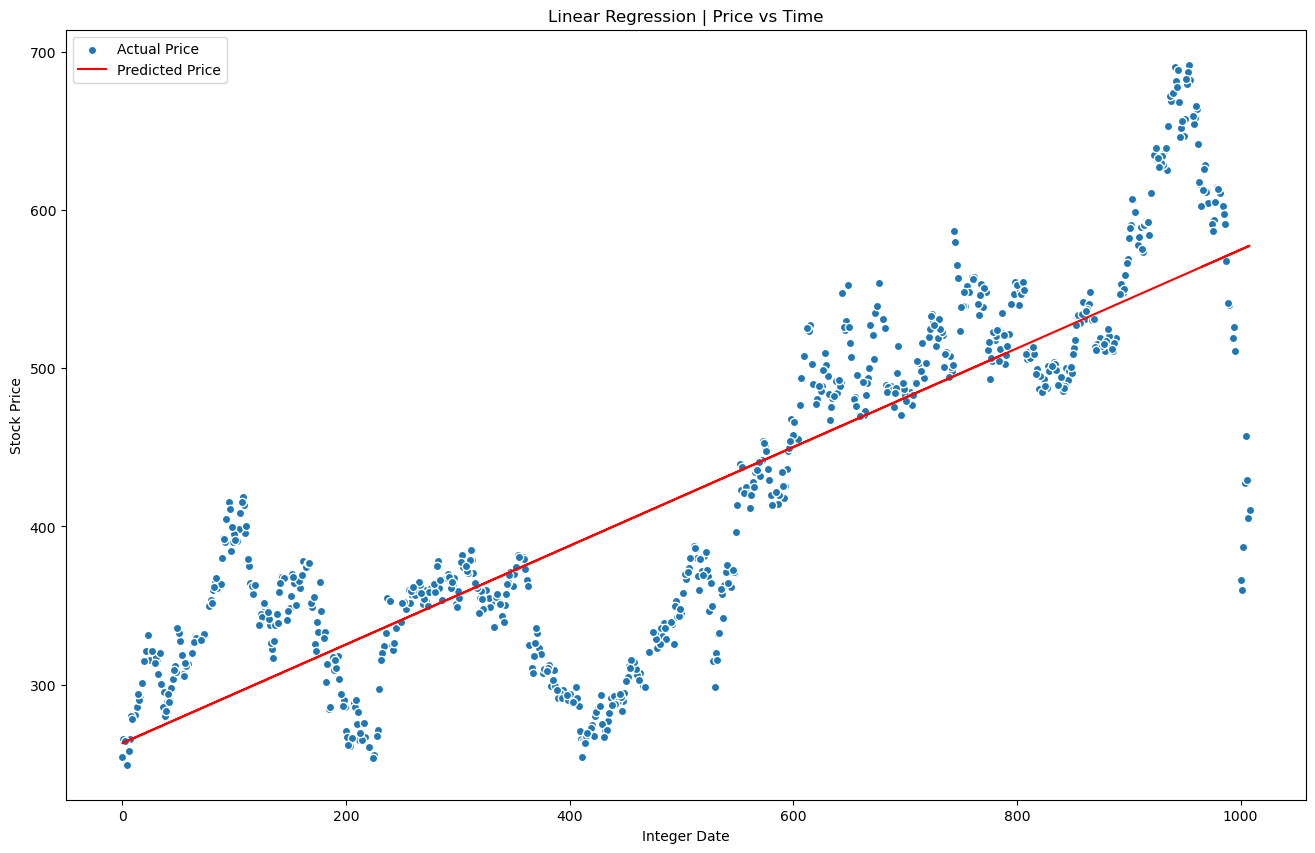

In [41]:
plt.figure(1, figsize=(16,10))
plt.title('Linear Regression | Price vs Time')
plt.scatter(X_train, y_train, edgecolor='w', label='Actual Price')
plt.plot(X_train, mod.predict(X_train), color='r', label='Predicted Price')
plt.xlabel('Integer Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [45]:
# Create test arrays
X_test = np.array(test.index).reshape(-1, 1)
y_test = test['Close']
y_pred = mod.predict(X_test)

In [46]:
y_pred

array([469.15613336, 521.84328946, 339.15291385, 389.03424507,
       269.94256677, 337.90588057, 456.99755887, 326.37082272,
       300.80664047, 371.57577914, 340.08818881, 268.38377517,
       511.24350658, 444.52722606, 451.07415079, 403.68688612,
       353.18203825, 381.24028707, 341.95873873, 496.27910721,
       451.69766743, 333.8530224 , 394.33413652, 499.39669041,
       462.60920863, 376.87567059, 450.76239247, 317.95334808,
       449.82711751, 485.367566  , 445.1507427 , 566.11297093,
       477.88536632, 374.0698457 , 332.60598912, 483.8087744 ,
       572.34813733, 531.19603907, 436.73326806, 415.84546061,
       314.52400655, 441.09788454, 452.94470071, 502.82603193,
       552.39560484, 573.59517061, 571.10110405, 480.37943288,
       331.35895584, 466.66206679, 266.82498357, 501.26724033,
       545.22516348, 566.42472925, 397.1399614 , 269.31905013,
       303.30070703, 486.30284096, 284.59520782, 473.83250816,
       330.11192256, 405.55743604, 351.93500497, 410.23

In [47]:
df1['Prediction'] = mod.predict(np.array(df1.index).reshape(-1, 1))

In [48]:
df1

,Date,Close,Prediction
0,2018-02-05,254.259995,263.083884
1,2018-02-06,265.720001,263.395642
2,2018-02-07,264.559998,263.707400
3,2018-02-08,250.100006,264.019159
4,2018-02-09,249.470001,264.330917
...,...,...,...
1004,2022-01-31,427.140015,576.089237
1005,2022-02-01,457.130005,576.400995
1006,2022-02-02,429.480011,576.712754
1007,2022-02-03,405.600006,577.024512


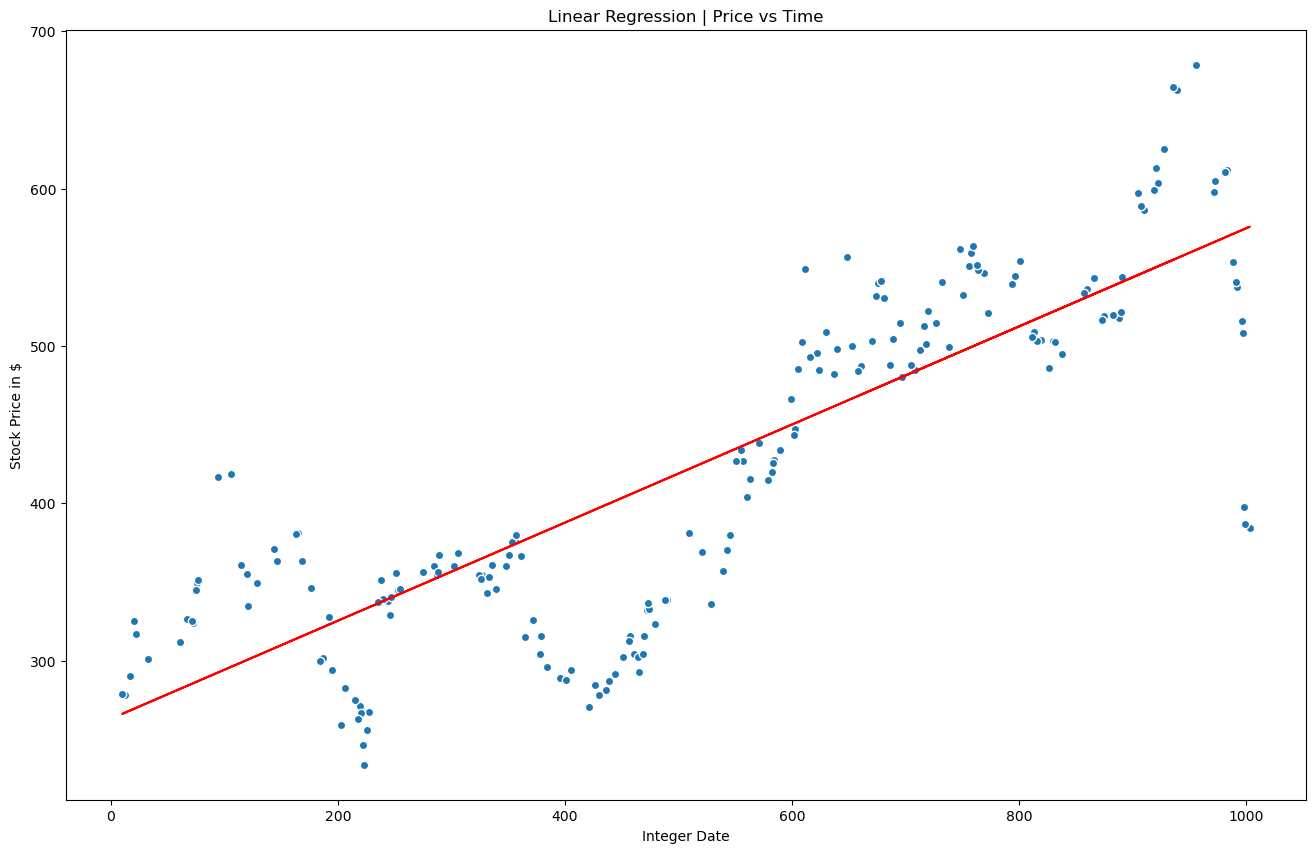

In [49]:
# Plot fitted line, y test
plt.figure(1, figsize=(16,10))
plt.title('Linear Regression | Price vs Time')
plt.plot(X_test, mod.predict(X_test), color='r', label='Predicted Price')
plt.scatter(X_test, y_test, edgecolor='w', label='Actual Price')

plt.xlabel('Integer Date')
plt.ylabel('Stock Price in $')

plt.show()


In [50]:
# Import metrics package from sklearn for statistical analysis
from sklearn import metrics

In [51]:
# Statistical summary of test data
df1['Close'].describe()

count    1009.000000
mean      419.000733
std       108.289999
min       233.880005
25%       331.619995
50%       378.670013
75%       509.079987
max       691.690002
Name: Close, dtype: float64

In [52]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 45.66280535302375
Mean Squared Error: 3468.790884020883
Root Mean Squared Error: 58.896442031933326


In [53]:
print('R2: ', metrics.r2_score(y_test, y_pred))

R2:  0.6926698426671881


In [54]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y_test, y_pred)

0.6959028484570956